# Introduction to Convolutional Neural Networks and Computer Vision with tensorflow

## Get the data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-09-08 13:46:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  87.8MB/s    in 1.2s    

2021-09-08 13:46:56 (87.8 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data(become one with it)

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [4]:
import os

# Walk through pizza_steak diractory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [5]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

# Visualizing the images

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of the classes_names from the subdirector
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [7]:
# Visualizing our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory(we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in th image and plot ot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}")

  return img

['3168266.jpg']
Image Shape: (512, 384, 3)


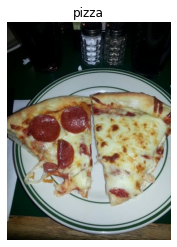

In [8]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 0,  1,  0],
        [ 0,  2,  0],
        [ 1,  3,  0],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 0,  1,  0],
        [ 1,  3,  0],
        [ 1,  3,  0],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 1,  3,  0],
        [ 2,  4,  1],
        [ 1,  3,  0],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       ...,

       [[ 3,  4,  0],
        [ 3,  4,  0],
        [ 4,  5,  0],
        ...,
        [82, 64, 44],
        [83, 65, 45],
        [85, 67, 47]],

       [[ 1,  2,  0],
        [ 2,  3,  0],
        [ 2,  3,  0],
        ...,
        [73, 55, 35],
        [72, 54, 34],
        [73, 55, 35]],

       [[ 1,  1,  0],
        [ 1,  1,  0],
        [ 2,  2,  0],
        ...,
        [70, 52, 32],
        [68, 50, 30],
        [68, 50, 30]]], dtype=uint8)>

In [10]:
# View the image shape
img.shape # returns width, height, color channels

(512, 384, 3)

In [11]:
# Get all the pixel values between 0 & 1
img/255.0

array([[[0.        , 0.00392157, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.00392157, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.01176471, 0.        ],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00392157, 0.01176471, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.01176471, 0.01568627, 0.        ],
        [0.01176471, 0.01568627, 0.        ],
        [0.01568627, 0

## An end to end example 

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Set the seed
tf.random.set_seed(42)

# Preprocessng data(get all of the pixel values between 0 and 1, also called normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directiories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),  

  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")                             
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5,
                       steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 267ms/step - loss: 0.5617 - accuracy: 0.7060 - val_loss: 0.3614 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4200 - accuracy: 0.8113 - val_loss: 0.3695 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3854 - accuracy: 0.8320 - val_loss: 0.3499 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 11s 233ms/step - loss: 0.3491 - accuracy: 0.8527 - val_loss: 0.3315 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 11s 240ms/step - loss: 0.3029 - accuracy: 0.8767 - val_loss: 0.3005 - val_accuracy: 0.8700


In [13]:
# Epoch 1/5
# 47/47 [==============================] - 120s 3s/step - loss: 0.5598 - accuracy: 0.7080 - val_loss: 0.3953 - val_accuracy: 0.8240

In [14]:
## Get a model summary
model_1.summary(
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 0.8949 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more params than our CNN model, model_2 performs terrible...Lets try something else

In [17]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),                            
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),                             
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 3.5461 - accuracy: 0.6113 - val_loss: 0.7782 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 1.1957 - accuracy: 0.6960 - val_loss: 0.4694 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 10s 212ms/step - loss: 0.6752 - accuracy: 0.7300 - val_loss: 0.7416 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.5004 - accuracy: 0.7807 - val_loss: 0.4656 - val_accuracy: 0.7660
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4929 - accuracy: 0.7827 - val_loss: 0.4970 - val_accuracy: 0.7820
